<a href="https://colab.research.google.com/github/boaz22/IS2_PROJECT/blob/main/Maize_Disease_Prediction_Using_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/data/Blight/Corn_Blight (1117).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1134).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1122).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1124).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1136).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1130).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1128).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (112).JPG
/content/drive/MyDrive/data/Blight/Corn_Blight (1131).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1144).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1139).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (114).JPG
/content/drive/MyDrive/data/Blight/Corn_Blight (115).JPG
/content/drive/MyDrive/data/Blight/Corn_Blight (1138).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (1142).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (12).jpg
/content/drive/MyDrive/data/Blight/Corn_Blight (120).JPG
/content/drive/MyDri

In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 4198 files belonging to 4 classes.


In [7]:
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [8]:
len(dataset)

132

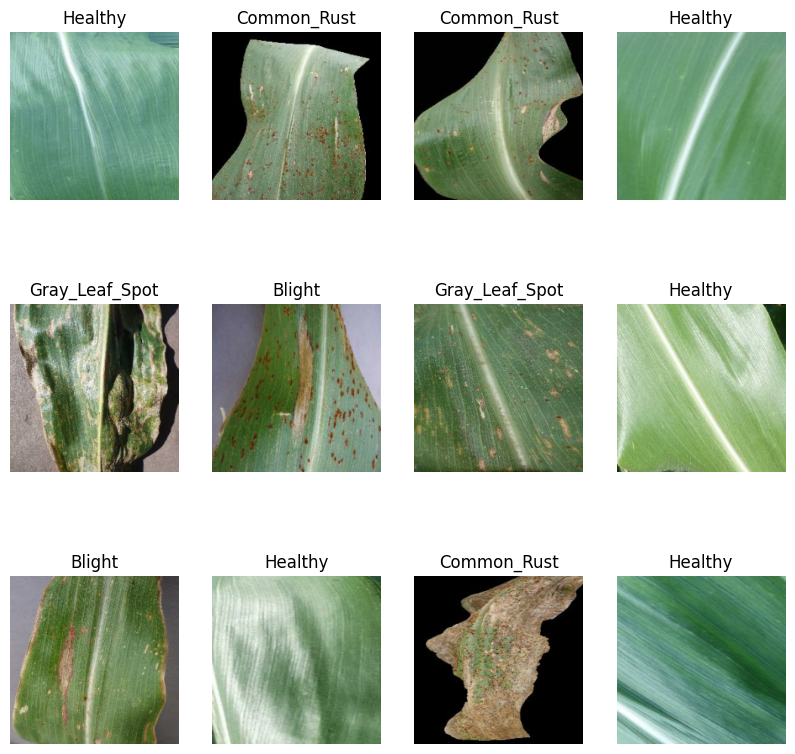

In [9]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [11]:
train_ds,val_ds,test_ds = get_dataset(dataset)

In [12]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 105

Length of Validation Dataset is 13

Length of Testing Dataset is 14


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing(224,224),
layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [16]:
n_classes = 4
input_shape = (BATCH_SIZE,224,224,3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),

])
model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 111, 111, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 54, 54, 64)         0         
 2D)                                                  

In [18]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [19]:
history=model.fit(
train_ds,
epochs=40,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/40
105/105 [==============================] - 1497s 4s/step - loss: 0.9967 - accuracy: 0.5207 - val_loss: 0.8764 - val_accuracy: 0.7332
Epoch 2/40
105/105 [==============================] - 374s 4s/step - loss: 0.7544 - accuracy: 0.6866 - val_loss: 0.7582 - val_accuracy: 0.7163
Epoch 3/40
105/105 [==============================] - 360s 3s/step - loss: 0.4648 - accuracy: 0.8254 - val_loss: 0.4136 - val_accuracy: 0.8197
Epoch 4/40
105/105 [==============================] - 374s 4s/step - loss: 0.3936 - accuracy: 0.8431 - val_loss: 0.3553 - val_accuracy: 0.8606
Epoch 5/40
105/105 [==============================] - 369s 4s/step - loss: 0.3244 - accuracy: 0.8641 - val_loss: 0.3018 - val_accuracy: 0.8726
Epoch 6/40
105/105 [==============================] - 357s 3s/step - loss: 0.3320 - accuracy: 0.8617 - val_loss: 0.4188 - val_accuracy: 0.8293
Epoch 7/40
105/105 [==============================] - 357s 3s/step - loss: 0.3120 - accuracy: 0.8737 - val_loss: 0.2867 - val_accuracy: 0.879

In [20]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 28s 797ms/step - loss: 0.1173 - accuracy: 0.9487


In [ ]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 105}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

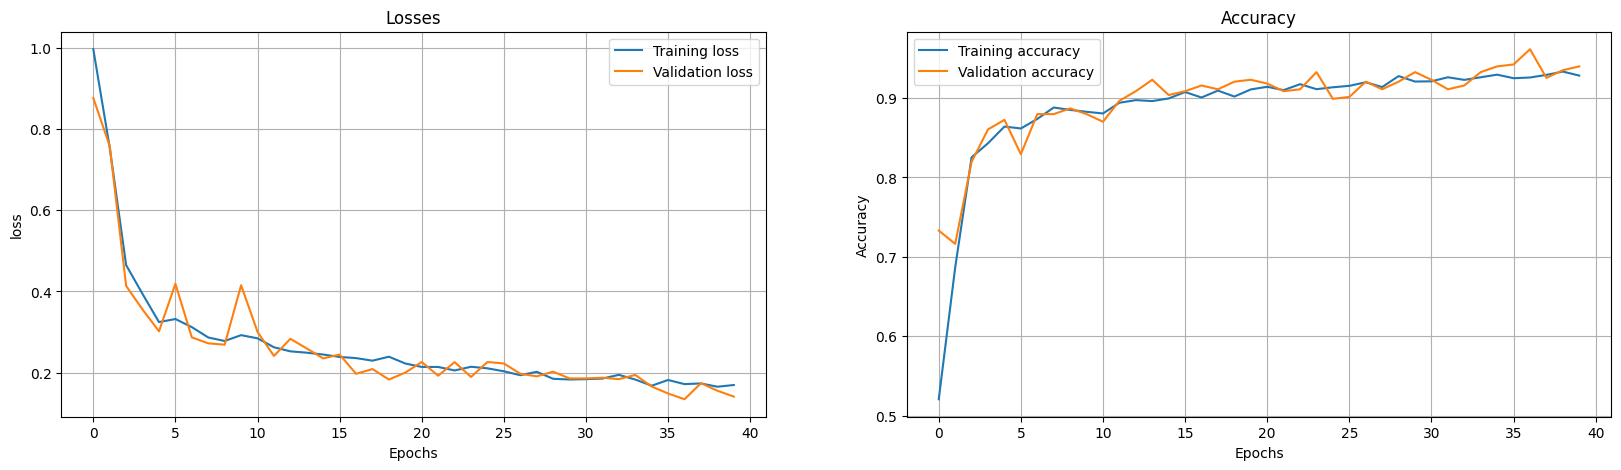

In [24]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

First Image to Predict :

Actual label: Healthy
1/1 [==============================] - 1s 1s/step

Predicted label Healthy


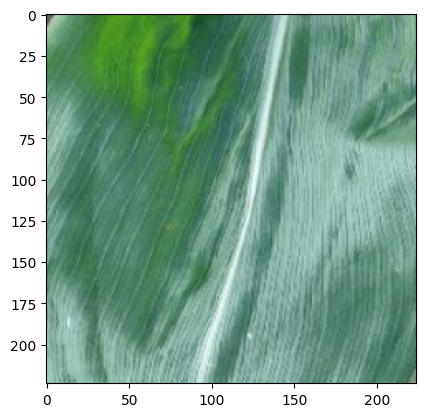

In [25]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to Predict :")
    plt.imshow(first_image)
    print("\nActual label:",class_names[first_label])
    batch_prediction = model. predict (images_batch)
    print("\nPredicted label" ,class_names[np.argmax(batch_prediction[0])])

In [26]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict (img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(np.max(predictions[0]),2)
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidence

1/1 [==============================] - 0s 42ms/step


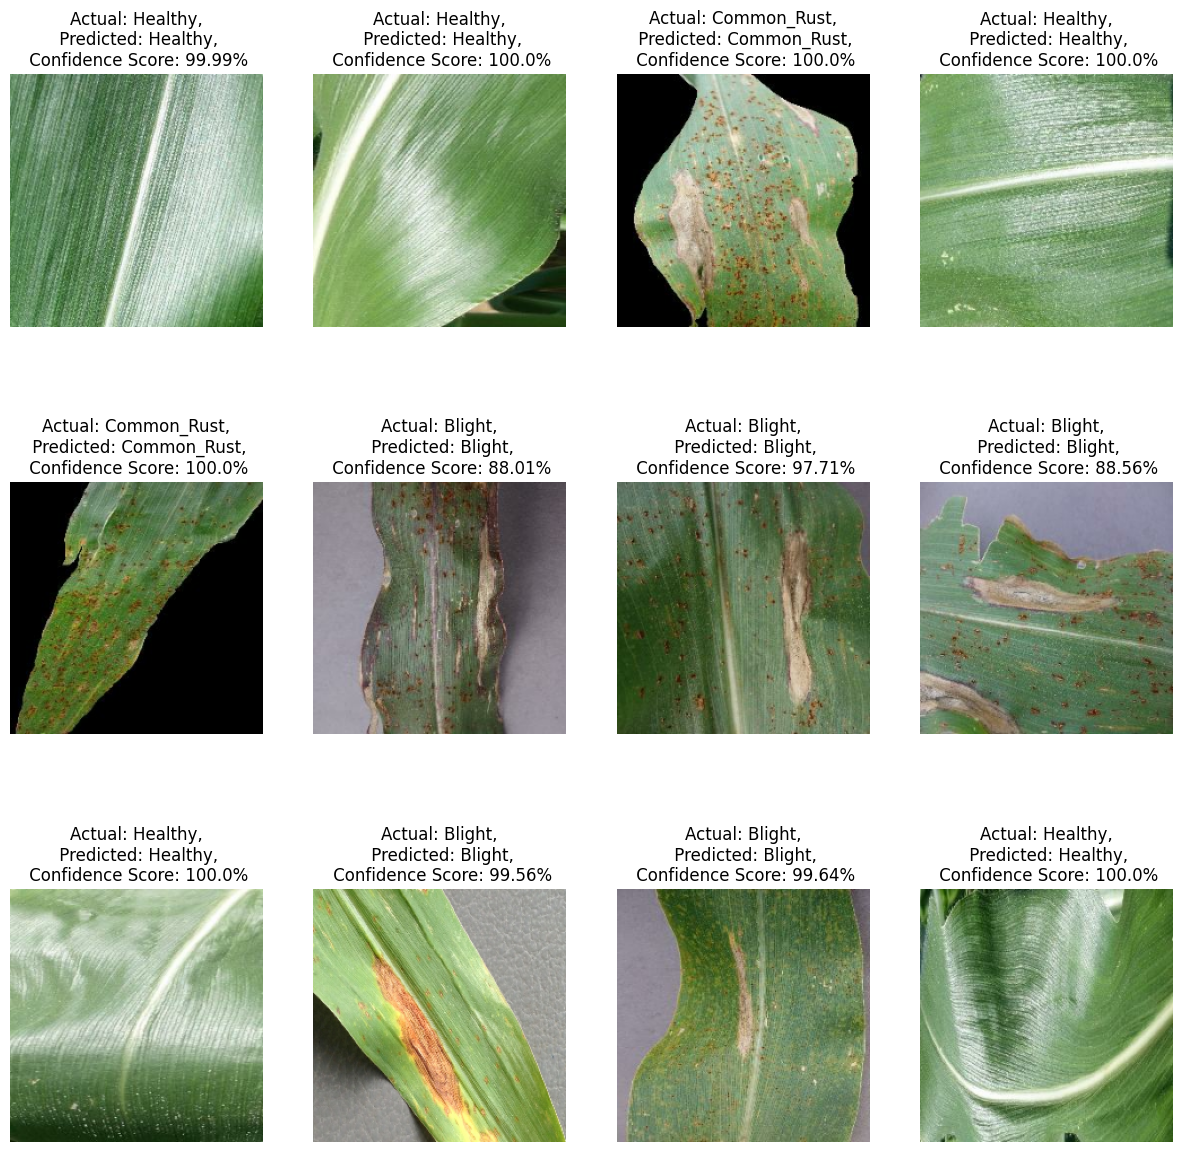

In [27]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")


In [28]:
model.save('inceptionV3.h5')

In [29]:
model.save('/content/drive/MyDrive/data/ISProject_Model.h5')